In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
# Amazon Prime Video dataset
# https://drive.google.com/file/d/1hLybYcNigdYXf8ECbMZQlnIo2GCvIkvn/view?usp=sharing
id = "1hLybYcNigdYXf8ECbMZQlnIo2GCvIkvn"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('TVdata.txt')
df = pd.read_csv('TVdata.txt')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   import_id                      4226 non-null   object 
 5   release_year                   4226 non-null   int64  
 6   genres                         4226 non-null   object 
 7   imdb_votes                     4226 non-null   int64  
 8   budget                         4226 non-null   int64  
 9   boxoffice                      4226 non-null   int64  
 10  imdb_rating                    4226 non-null   float64
 11  duration_in_mins               4226 non-null   float64
 12  metacritic_score               4226 non-null   i

In [7]:
# imdb_votes, budget, boxoffice, imdb_rating, metacritic_score, star_category have missing values
# because their min is 0
df.describe()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000,4226.000000,4226.000000,4226.000000
mean,280371.162565,4218.630239,7.782537,28.103644,2001.056791,6462.924042,2.150743e+06,2.536338e+06,5.257099,89.556123,15.973734,0.954651
std,112640.127822,13036.079964,6.134183,11.863649,17.496849,31596.006790,7.176604e+06,8.243516e+06,2.122810,21.086183,26.205217,0.955045
min,7909.000000,2.187625,1.000000,1.000000,1916.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,4.037250,0.000000,0.000000
25%,285104.250000,351.168776,4.000000,20.000000,1998.000000,81.000000,0.000000e+00,0.000000e+00,4.300000,82.601712,0.000000,0.000000
50%,313891.500000,1193.499989,6.000000,28.000000,2008.000000,535.000000,0.000000e+00,0.000000e+00,5.800000,90.730308,0.000000,1.000000
75%,349345.750000,3356.788816,9.000000,36.000000,2012.000000,3053.000000,1.500000e+06,0.000000e+00,6.800000,99.500312,41.000000,1.666667
max,394880.000000,307127.605608,41.000000,70.000000,2017.000000,948630.000000,1.070000e+08,1.842088e+08,10.000000,246.016767,100.000000,4.000000


In [8]:
df.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.605608,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.5,112.301017,51,other award,PG-13,1.710000
1,300175,270338.426375,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.5,94.983250,41,no award,R,3.250000
2,361899,256165.867446,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.3,115.763675,58,other award,R,2.646667
3,308314,196622.720996,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.6,130.703583,94,Oscar,R,1.666667
4,307201,159841.652064,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.4,105.545533,37,other award,R,3.066667


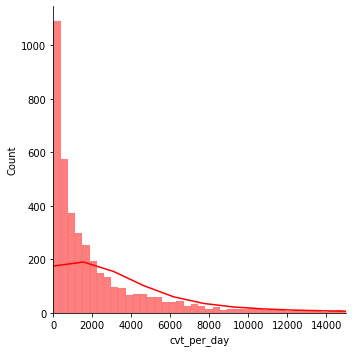

In [9]:
# data exploration
sns.displot(data=df, x='cvt_per_day', kde=True, color='red')
plt.xlim(0, 15000)
plt.show()

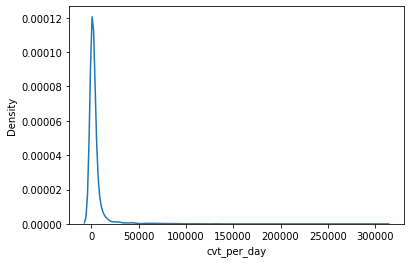

In [10]:
sns.kdeplot(data=df, x='cvt_per_day')

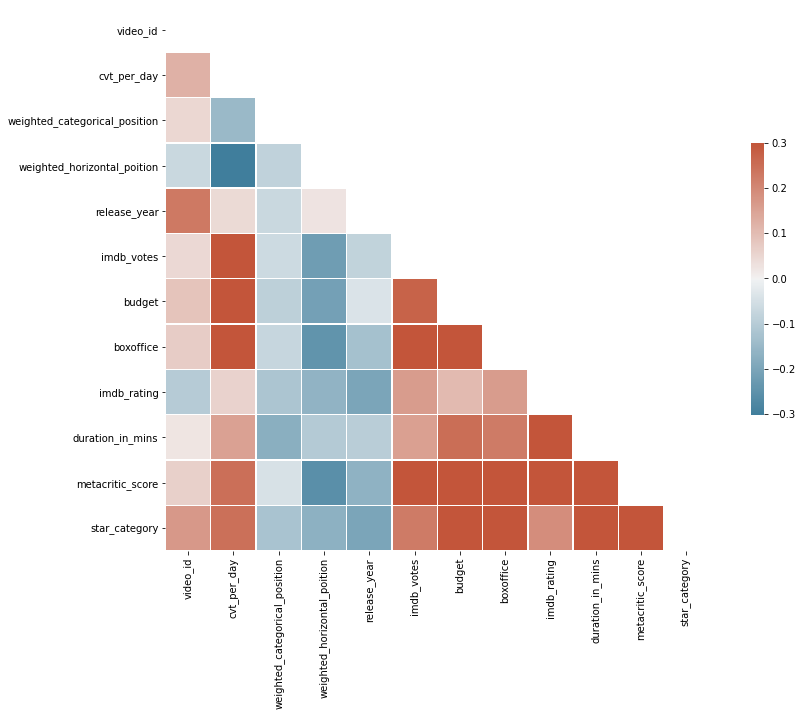

In [11]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
_, axss = plt.subplots(figsize=[15,10])
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
corr

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
video_id,1.000000,0.122352,0.050145,-0.067163,0.231145,0.047766,0.088285,0.071539,-0.099815,0.023838,0.063930,0.170079
cvt_per_day,0.122352,1.000000,-0.148000,-0.301663,0.045859,0.297697,0.315886,0.312209,0.058894,0.152217,0.249159,0.246956
weighted_categorical_position,0.050145,-0.148000,1.000000,-0.084066,-0.068902,-0.063700,-0.089899,-0.073628,-0.116443,-0.174461,-0.044317,-0.122851
weighted_horizontal_poition,-0.067163,-0.301663,-0.084066,1.000000,0.026634,-0.220749,-0.211356,-0.244709,-0.162021,-0.102344,-0.255015,-0.167801
release_year,0.231145,0.045859,-0.068902,0.026634,1.000000,-0.082661,-0.040121,-0.128091,-0.198856,-0.096811,-0.167038,-0.198454
imdb_votes,0.047766,0.297697,-0.063700,-0.220749,-0.082661,1.000000,0.272852,0.531467,0.163264,0.155670,0.321860,0.225192
budget,0.088285,0.315886,-0.089899,-0.211356,-0.040121,0.272852,1.000000,0.504618,0.105671,0.251342,0.314608,0.321721
boxoffice,0.071539,0.312209,-0.073628,-0.244709,-0.128091,0.531467,0.504618,1.000000,0.163673,0.226184,0.464965,0.322329
imdb_rating,-0.099815,0.058894,-0.116443,-0.162021,-0.198856,0.163264,0.105671,0.163673,1.000000,0.344055,0.346935,0.191768
duration_in_mins,0.023838,0.152217,-0.174461,-0.102344,-0.096811,0.155670,0.251342,0.226184,0.344055,1.000000,0.327050,0.309110


In [13]:
# imdb_votes, budget, boxoffice, imdb_rating, metacritic_score, star_category
# change 0 to na
df[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']] = df[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']].replace(0, np.nan)

In [14]:
# fill na with mean value
df['boxoffice'] = df['boxoffice'].fillna(df['boxoffice'].mean())
df['metacritic_score'] = df['metacritic_score'].fillna(df['metacritic_score'].mean())
df['star_category'] = df['star_category'].fillna(df['star_category'].mean())
df['imdb_votes'] = df['imdb_votes'].fillna(df['imdb_votes'].mean())
df['imdb_rating'] = df['imdb_rating'].fillna(df['imdb_rating'].mean())
df['budget'] = df['budget'].fillna(df['budget'].mean())

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   import_id                      4226 non-null   object 
 5   release_year                   4226 non-null   int64  
 6   genres                         4226 non-null   object 
 7   imdb_votes                     4226 non-null   float64
 8   budget                         4226 non-null   float64
 9   boxoffice                      4226 non-null   float64
 10  imdb_rating                    4226 non-null   float64
 11  duration_in_mins               4226 non-null   float64
 12  metacritic_score               4226 non-null   f

In [16]:
# transfer genres to multiple columns
for i in range(len(df)):
    cur = df.loc[i, 'genres'].split(',')
    for category in cur:
        if category not in df.columns:
            df[category] = 0
        df.loc[i, category] = 1
df.drop(labels='genres', axis=1, inplace=True)

In [17]:
# awards 'other award', 'no award', 'Oscar', 'Golden Globe', 'BAFTA'
# mpaa 'PG-13', 'R', 'PG', 'NC-17', 'NotRated', 'G'
# import_id 'lionsgate', 'other', 'mgm', 'paramount'
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):  
    transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names(categories))
    return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

In [18]:
# one hot encoding
# awards 'other award', 'no award', 'Oscar', 'Golden Globe', 'BAFTA'
categories = ['awards']
enc_ohe = OneHotEncoder()
enc_ohe.fit(df[categories])

df = OneHotEncoding(df, enc_ohe, categories)

In [19]:
# mpaa 'PG-13', 'R', 'PG', 'NC-17', 'NotRated', 'G'
categories = ['mpaa']
enc_ohe = OneHotEncoder()
enc_ohe.fit(df[categories])

df = OneHotEncoding(df, enc_ohe, categories)

In [20]:
# import_id 'lionsgate', 'other', 'mgm', 'paramount'
categories = ['import_id']
enc_ohe = OneHotEncoder()
enc_ohe.fit(df[categories])

df = OneHotEncoding(df, enc_ohe, categories)

In [21]:
df.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,Action,Thriller,Drama,Comedy,Crime,War,Documentary,Mystery,Adventure,Western,Sci-Fi,Fantasy,Horror,Sport,Kids & Family,Animation,Romance,Music,Independent,Musicals,Foreign/International,Lifestyle,Anime,Holiday,LGBT,Reality,Adult,awards_BAFTA,awards_Golden Globe,awards_Oscar,awards_no award,awards_other award,mpaa_G,mpaa_NC-17,mpaa_NotRated,mpaa_PG,mpaa_PG-13,mpaa_R,import_id_lionsgate,import_id_mgm,import_id_other,import_id_paramount
0,385504,307127.605608,1,3,2013,69614.0,15000000.0,42930462.0,6.5,112.301017,51.0,1.710000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,300175,270338.426375,1,3,2013,46705.0,15000000.0,3301046.0,6.5,94.983250,41.0,3.250000,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,361899,256165.867446,1,3,2012,197596.0,26000000.0,37397291.0,7.3,115.763675,58.0,2.646667,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,308314,196622.720996,3,4,2008,356339.0,15000000.0,15700000.0,7.6,130.703583,94.0,1.666667,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,307201,159841.652064,1,3,2013,46720.0,27220000.0,8551228.0,6.4,105.545533,37.0,3.066667,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [22]:
# split to 0.8 train and 0.2 test 
from sklearn import model_selection
y = df['cvt_per_day']
x = df.drop(['video_id', 'cvt_per_day'], axis=1)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2)

print('training data has ' + str(x_train.shape[0]) + ' observation with ' + str(x_train.shape[1]) + ' features')
print('test data has ' + str(x_test.shape[0]) + ' observation with ' + str(x_test.shape[1]) + ' features')

training data has 3380 observation with 52 features
test data has 846 observation with 52 features


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# linear regression
regression_linear = LinearRegression()

# random forest
regression_rf = RandomForestRegressor()

# gradient boosting
regression_gbm = GradientBoostingRegressor()

# xgboost
regression_xgboost = XGBRegressor()

In [24]:
# use 5-fold cross validation to get the accuracy for different models
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'xgboost']
model_list = [regression_linear, regression_rf, regression_gbm, regression_xgboost]
count = 0

for model in model_list:
    cv_score = model_selection.cross_val_score(model, x_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    print()
    count += 1

[0.20258332 0.3091821  0.21174143 0.21193574 0.19696468]
Model accuracy of Linear Regression is 0.2264814542879742

[0.52150619 0.73004094 0.67551674 0.524455   0.46668076]
Model accuracy of Random Forest is 0.5836399251874658

[0.43259604 0.58697508 0.6684279  0.49859931 0.47704485]
Model accuracy of Gradient Boosting is 0.5327286353039762

[16:35:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.65383378 0.7018044

In [25]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [26]:
# possible hyperparamter options for random forest

parameters = {
    'n_estimators' : [60, 80, 100, 1000],
    'max_depth': [1, 5, 10, 100]
}
Grid_RF = GridSearchCV(RandomForestRegressor(), parameters, cv=5)
Grid_RF.fit(x_train, y_train)

print_grid_search_metrics(Grid_RF)

Best score: 0.5866547437410601
Best parameters set:
max_depth:100
n_estimators:60


In [27]:
# best rf model
best_RF_model = Grid_RF.best_estimator_

In [28]:
# possible hyperparamter options for gradient boosting
parameters = {
    'n_estimators': [500, 1000, 2000],
    'learning_rate': [0.001, 0.01, .1],
    'max_depth': [1, 2, 4],
    'subsample': [.5, .75, 1],
    'random_state': [1]
}
Grid_gbm = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5)
Grid_gbm.fit(x_train, y_train)

print_grid_search_metrics(Grid_gbm)

Best score: 0.5761203708047036
Best parameters set:
learning_rate:0.01
max_depth:4
n_estimators:500
random_state:1
subsample:0.75


In [29]:
# best gbm model
best_gbm_model = Grid_gbm.best_estimator_

In [35]:
# evaluation
# random forest
from sklearn.metrics import mean_squared_error
pred_y = best_RF_model.predict(x_test)
rf_score = best_RF_model.score(x_test, y_test)
MSE_rf = mean_squared_error(y_test, pred_y)
RMSE_rf = np.sqrt(MSE_rf)
print ('rf score: ', rf_score)
print ('Mean square error of rf: ', MSE_rf)
print ('Root mean squared error of rf:', RMSE_rf)

rf score:  0.617900796635644
Mean square error of rf:  75021988.90639561
Root mean squared error of rf: 8661.523474908765


In [34]:
# gradient boosting
pred_y = best_gbm_model.predict(x_test)
gbm_score = best_gbm_model.score(x_test, y_test)
MSE_gbm = mean_squared_error(y_test, pred_y)
RMSE_gbm = np.sqrt(MSE_gbm)
print ('gbm score: ', gbm_score)
print ('Mean square error of gbm: ', MSE_gbm)
print ('Root mean squared error of gbm:', RMSE_gbm)

gbm score:  0.641426034405185
Mean square error of gbm:  70403004.85349281
Root mean squared error of gbm: 8390.649846912504


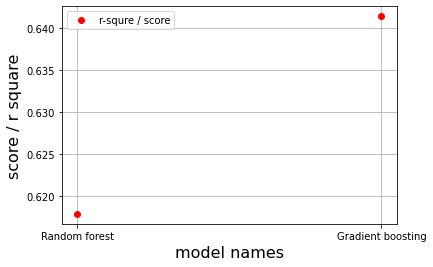

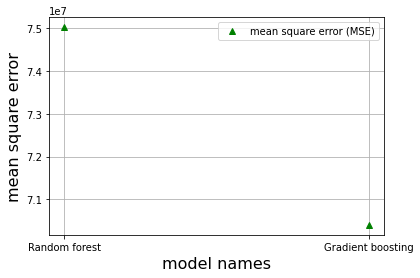

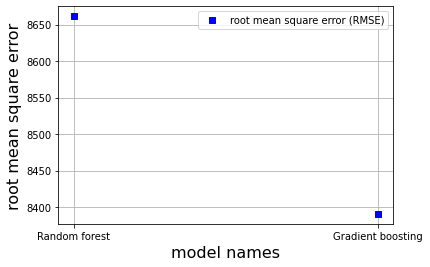

In [36]:
# compare two models
lst_score = [rf_score, gbm_score]
MSE_lst =  [MSE_rf, MSE_gbm]
RMSE_lst =  [RMSE_rf, RMSE_gbm]
model_lst = ['Random forest', 'Gradient boosting']

plt.figure(1)
plt.plot(model_lst, lst_score, 'ro')
plt.legend(['r-squre / score'])
plt.xlabel('model names',fontsize =16)
plt.ylabel('score / r square', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(model_lst, MSE_lst, 'g^')
plt.legend(['mean square error (MSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('mean square error', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(3)
plt.plot(model_lst, RMSE_lst, 'bs')
plt.legend(['root mean square error (RMSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('root mean square error', fontsize =16)
plt.grid(True)
plt.show()

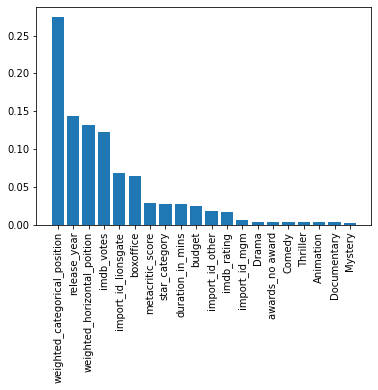

In [37]:
# according to the comparison, gradient boosting is the better model
# feature importance
importances = best_gbm_model.feature_importances_
feature_name = x_train.columns.values
indices = np.argsort(importances)[::-1]
plt.figure(1)
plt.bar(feature_name[indices[:20]], importances[indices[:20]])
plt.xticks(rotation=90)
plt.show()